<a href="https://colab.research.google.com/github/joseluis-hd/Machine-Learning-25A/blob/main/pract_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 2: Regresión múltiple**
José Luis Haro Díaz


In [ ]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [ ]:
#Cargar dataset
data_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje - Máquina/datasets/Student_Performance.csv', header = 0, encoding = 'latin-1')
data_file

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
#Codificar la variable categórica 'Extracurricular Activities'
data_file["Extracurricular Activities"] = data_file["Extracurricular Activities"].map({"No": 0, "Yes": 1})

#Separar variables independientes y dependiente
x = data_file.drop(columns=["Performance Index"])
y = data_file["Performance Index"]

#Dividir los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [ ]:
#Normalizar los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Modelo con sklearn
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred_sklearn = model.predict(x_test_scaled)
cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")

print("Modelo con sklearn - MSE promedio:", np.mean(-cv_scores))

Modelo con sklearn - MSE promedio: 4.136471697351036


In [ ]:
#Regresión con gradiente descendente
theta = np.zeros(x_train_scaled.shape[1])
bias = 0
learning_rate = 0.005  #Ajustado para estabilidad
num_iterations = 1000
m = len(y_train)
mse_history = []

for _ in range(num_iterations):
    y_pred = np.dot(x_train_scaled, theta) + bias
    error = y_pred - y_train
    theta -= learning_rate * (1/m) * np.dot(x_train_scaled.T, error)
    bias -= learning_rate * (1/m) * np.sum(error)
    mse_history.append(np.mean(error**2))

    if len(mse_history) > 1 and abs(mse_history[-1] - mse_history[-2]) < 1e-6:
        break

In [ ]:
#Validación cruzada K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_values = []

for train_idx, val_idx in kf.split(x_train_scaled):
    X_train_k, X_val_k = x_train_scaled[train_idx], x_train_scaled[val_idx]
    y_train_k, y_val_k = y_train.iloc[train_idx], y_train.iloc[val_idx]
    y_pred_k = np.dot(X_val_k, theta) + bias
    mse_k = np.mean((y_val_k - y_pred_k) ** 2)
    mse_values.append(mse_k)

print("Modelo con gradiente descendente - MSE promedio:", np.mean(mse_values))

Modelo con gradiente descendente - MSE promedio: 4.280412373703024


Modelo con gradiente descendente - MSE promedio: 4.280412373703024


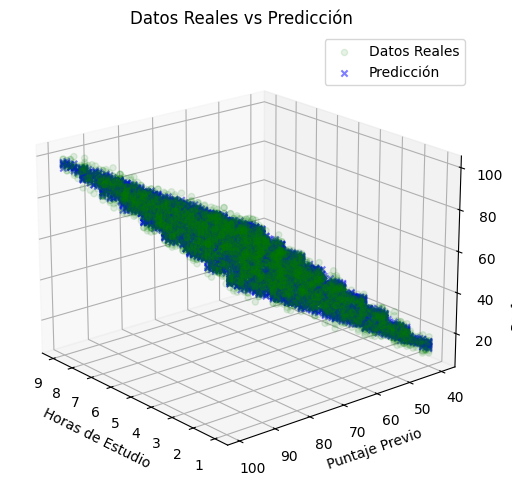

In [ ]:
print("Modelo con gradiente descendente - MSE promedio:", np.mean(mse_values))

#Gráfica 3D: Predicción vs Real (Ajustada al estilo de los ejemplos)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

#Tomar solo dos características para la gráfica
x_feature = x_test.iloc[:, 0]  #Primera variable independiente
y_feature = x_test.iloc[:, 1]  #Segunda variable independiente

#Puntos reales
ax.scatter(x_feature, y_feature, y_test, color='green', alpha=0.1, marker='o', label='Datos Reales')

#Puntos predichos (Regresión Lineal)
ax.scatter(x_feature, y_feature, y_pred_sklearn, color='blue', alpha=0.5, marker='x', label='Predicción')

#Configuración del gráfico
ax.set_xlabel("Horas de Estudio")
ax.set_ylabel("Puntaje Previo")
ax.set_zlabel("Performance Index")
ax.set_title("Datos Reales vs Predicción")
ax.view_init(elev=20, azim=140)  #Ajuste del ángulo de visión
ax.legend()

plt.show()

Modelo con gradiente descendente - MSE promedio: 4.280412373703024


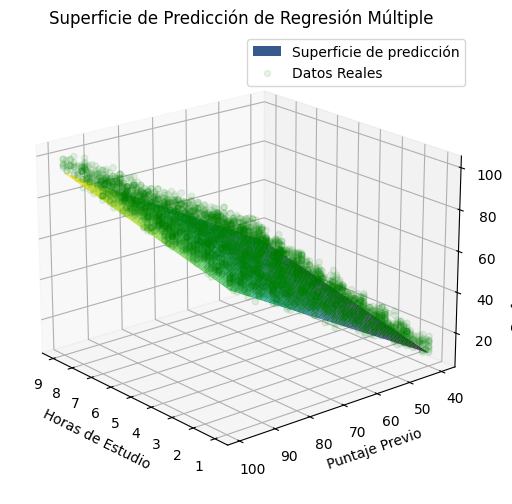

In [ ]:
print("Modelo con gradiente descendente - MSE promedio:", np.mean(mse_values))

#Gráfica 3D con superficie de predicción
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

#Crear una malla de valores
x_feature = x_test.iloc[:, 0]  #Primera variable independiente
y_feature = x_test.iloc[:, 1]  #Segunda variable independiente
x_range = np.linspace(x_feature.min(), x_feature.max(), 50)
y_range = np.linspace(y_feature.min(), y_feature.max(), 50)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

#Convertir la malla en DataFrame con las mismas columnas que X_train
#Replacing x_mesh with X_mesh since x_mesh is not defined
x_grid = pd.DataFrame(np.c_[X_mesh.ravel(), Y_mesh.ravel(), np.zeros((X_mesh.size, x_train.shape[1] - 2))], columns=x_train.columns)
Z_mesh = model.predict(scaler.transform(x_grid))
Z_mesh = Z_mesh.reshape(X_mesh.shape)

#Representar la superficie de predicción primero
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', label='Superficie de predicción')

#Puntos reales encima con menor opacidad
ax.scatter(x_feature, y_feature, y_test, color='green', alpha=0.09, marker='o', label='Datos Reales')

#Configuración del gráfico
ax.set_xlabel("Horas de Estudio")
ax.set_ylabel("Puntaje Previo")
ax.set_zlabel("Performance Index")
ax.set_title("Superficie de Predicción de Regresión Múltiple")
ax.view_init(elev=20, azim=140)
ax.legend()

plt.show()

In [ ]:
import plotly.graph_objects as go

#Gráfica 3D interactiva - Predicción vs Real
fig = go.Figure()

#Datos reales en verde
fig.add_trace(go.Scatter3d(x=x_test.iloc[:, 0], y=x_test.iloc[:, 1], z=y_test,
                            mode='markers', marker=dict(color='green', size=5, opacity=0.5),
                            name='Datos Reales'))

#Predicción con color más azulado dentro de 'viridis' (#21918C - verde azulado oscuro)
fig.add_trace(go.Scatter3d(x=x_test.iloc[:, 0], y=x_test.iloc[:, 1], z=y_pred_sklearn,
                            mode='markers', marker=dict(color='#21918C', size=5, opacity=0.6),
                            name='Predicción'))

#Configuración del layout
fig.update_layout(title='Regresión Lineal Múltiple - Predicción vs Real',
                  scene=dict(xaxis_title='Horas de Estudio',
                             yaxis_title='Puntaje Previo',
                             zaxis_title='Performance Index'),
                  annotations=[dict(text='Datos Reales (Green) - Predicción (Aqua)',
                                    x=0.5, y=1.1, showarrow=False, xref='paper', yref='paper')])

fig.show()

In [ ]:
import plotly.graph_objects as go

#Crear la malla de valores
x_range = np.linspace(x_test.iloc[:, 0].min(), x_test.iloc[:, 0].max(), 50)
y_range = np.linspace(x_test.iloc[:, 1].min(), x_test.iloc[:, 1].max(), 50)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
x_grid = pd.DataFrame(np.c_[X_mesh.ravel(), Y_mesh.ravel(), np.zeros((X_mesh.size, x_train.shape[1] - 2))], columns=x_train.columns)
Z_mesh = model.predict(scaler.transform(x_grid))
Z_mesh = Z_mesh.reshape(X_mesh.shape)

#Crear la figura
fig = go.Figure()

#Superficie de predicción con 'viridis'
fig.add_trace(go.Surface(x=X_mesh, y=Y_mesh, z=Z_mesh, colorscale='viridis', opacity=0.7))

#Datos reales con un verde azulado oscuro para armonizar con 'viridis'
fig.add_trace(go.Scatter3d(x=x_test.iloc[:, 0], y=x_test.iloc[:, 1], z=y_test,
                            mode='markers', marker=dict(color='green', size=5, opacity=0.6),
                            name='Datos Reales'))

#Configuración del layout
fig.update_layout(title='Superficie de Predicción de Regresión Múltiple',
                  scene=dict(xaxis_title='Horas de Estudio',
                             yaxis_title='Puntaje Previo',
                             zaxis_title='Performance Index'),
                  annotations=[dict(text='Datos Reales (Verde) - Superficie de Predicción (Viridis) ',
                                    x=0.5, y=1.1, showarrow=False, xref='paper', yref='paper')])

fig.show()

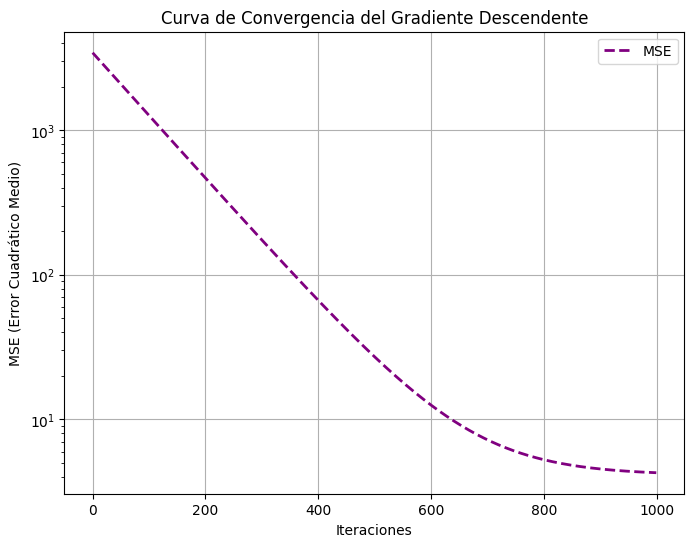

In [ ]:
#Gráfica de convergencia con escala logarítmica
plt.figure(figsize=(8, 6))
plt.plot(range(len(mse_history)), mse_history, color='purple', linewidth=2, linestyle='--', label='MSE')
plt.xlabel("Iteraciones")
plt.ylabel("MSE (Error Cuadrático Medio)")
plt.title("Curva de Convergencia del Gradiente Descendente")
plt.yscale("log")  #Escala logarítmica para mejor visualización
plt.legend()
plt.grid()
plt.show()